# Create correlation heatmap from normalized and feature selected NF1 data for both CellProfiler and DeepProfiler

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import seaborn as sb

import sys
sys.path.append("../UMAP_analysis/")
import UMAPutils as utils

## CellProfiler data

### Read in NF1 data `csv`

In [2]:
norm_fs_data = pathlib.Path("../../../4_processing_features/data/nf1_sc_norm_fs_cellprofiler.csv.gz")

data = pd.read_csv(norm_fs_data, index_col=0)

print(data.shape)
data.head()

(149, 444)


,Metadata_WellRow,Metadata_WellCol,Metadata_number_of_singlecells,Metadata_gene_name,Metadata_genotype,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_OrigNuclei,...,Nuclei_Texture_InfoMeas1_RFP_3_03_256,Nuclei_Texture_InfoMeas2_GFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_01_256,Nuclei_Texture_InfoMeas2_RFP_3_02_256,Nuclei_Texture_InfoMeas2_RFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_GFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_00_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_03_256,Nuclei_Texture_SumVariance_RFP_3_01_256
0,C,6,12,NF1,WT,1,1,C6,1,4,...,-1.197488,0.289091,0.969456,1.131385,1.303680,1.416917,-0.079438,-2.315521,-1.693210,2.881199
1,C,6,12,NF1,WT,1,1,C6,2,5,...,0.188414,0.611666,0.481954,0.748184,0.750277,0.511083,-0.065958,-1.460076,-1.427579,0.304121
2,C,6,12,NF1,WT,1,1,C6,3,7,...,-1.087258,0.843883,-0.214887,0.238299,0.482832,1.264950,-0.069749,-1.841707,-0.798368,0.257284
3,C,6,12,NF1,WT,1,1,C6,4,8,...,-1.250742,0.638684,1.163023,1.062039,1.082605,1.386850,-0.272864,-1.789888,-1.432404,1.083761
4,C,6,12,NF1,WT,4,1,C6,1,3,...,-0.258815,-2.222128,-0.048779,0.504843,1.340830,0.924382,0.612704,-2.158178,-1.781201,0.518641


### Split NF1 data `csv`

In [3]:
metadata_dataframe, feature_data = utils.split_data(data)
feature_data

,Cells_AreaShape_BoundingBoxArea,Cells_AreaShape_FormFactor,Cells_AreaShape_MaximumRadius,Cells_AreaShape_MedianRadius,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_3_3,...,Nuclei_Texture_InfoMeas1_RFP_3_03_256,Nuclei_Texture_InfoMeas2_GFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_00_256,Nuclei_Texture_InfoMeas2_RFP_3_01_256,Nuclei_Texture_InfoMeas2_RFP_3_02_256,Nuclei_Texture_InfoMeas2_RFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_GFP_3_03_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_00_256,Nuclei_Texture_InverseDifferenceMoment_RFP_3_03_256,Nuclei_Texture_SumVariance_RFP_3_01_256
0,-0.572221,0.667712,-0.009554,0.264079,0.463854,1.582286,-0.151997,-1.390352,2.178470,1.480541,...,-1.197488,0.289091,0.969456,1.131385,1.303680,1.416917,-0.079438,-2.315521,-1.693210,2.881199
1,1.293673,0.322177,2.286360,2.501898,1.122764,-0.093265,0.183837,0.065645,-0.285497,-0.207874,...,0.188414,0.611666,0.481954,0.748184,0.750277,0.511083,-0.065958,-1.460076,-1.427579,0.304121
2,-0.018945,-0.194305,-0.144742,-0.079778,-0.702888,-0.336227,-0.872407,-1.208937,0.234533,-0.288710,...,-1.087258,0.843883,-0.214887,0.238299,0.482832,1.264950,-0.069749,-1.841707,-0.798368,0.257284
3,1.018112,-0.545145,0.220632,0.644820,-0.873168,0.151905,-0.486779,0.713904,0.639545,0.873920,...,-1.250742,0.638684,1.163023,1.062039,1.082605,1.386850,-0.272864,-1.789888,-1.432404,1.083761
4,-1.107735,2.160816,-0.502534,0.644820,2.030555,0.720492,1.233248,3.019211,0.522371,0.794991,...,-0.258815,-2.222128,-0.048779,0.504843,1.340830,0.924382,0.612704,-2.158178,-1.781201,0.518641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,-1.321130,3.283616,-1.009824,-0.376875,1.599989,-1.132114,2.175426,1.113361,-1.577001,-1.202978,...,-0.730713,-3.721664,0.344692,0.526792,0.444591,0.664847,1.259085,0.745004,0.968347,-0.322389
145,-0.823611,1.193446,-0.403809,0.394474,1.326061,-0.032073,1.326563,0.152387,0.289224,0.051021,...,0.925737,-1.410478,0.047610,-0.030179,-0.897448,-1.032699,0.849219,0.627234,0.096817,-0.326481
146,0.285412,0.101972,0.009590,0.780149,0.122676,-1.230529,0.206663,0.418395,-1.501735,0.072517,...,1.010381,-1.976427,-1.631117,-0.338652,-0.706971,-1.383757,0.484107,0.874705,0.836486,-0.367298
147,-0.529599,0.322288,-0.583080,0.264079,0.971550,-0.672573,0.647603,0.658406,-0.437785,-0.224140,...,0.816456,-0.562581,-0.583551,0.145784,0.008261,-0.761469,-0.490888,0.058825,-0.088908,-0.304325


### Transpose the NF1 dataframe

In [4]:
data_trans = feature_data.transpose()
data_trans


,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
Cells_AreaShape_BoundingBoxArea,-0.572221,1.293673,-0.018945,1.018112,-1.107735,4.492992,0.034684,3.862003,0.156254,-0.653067,...,-0.619269,1.542217,0.560800,0.409742,0.506309,-1.321130,-0.823611,0.285412,-0.529599,-1.093078
Cells_AreaShape_FormFactor,0.667712,0.322177,-0.194305,-0.545145,2.160816,-1.427165,0.479554,-0.787164,-0.060946,-0.283157,...,0.186830,-1.311794,-0.724151,-0.615119,-0.842436,3.283616,1.193446,0.101972,0.322288,2.107963
Cells_AreaShape_MaximumRadius,-0.009554,2.286360,-0.144742,0.220632,-0.502534,2.069569,1.833441,2.688226,1.321017,-0.857875,...,-0.448862,-0.955878,-0.280539,-0.756730,0.836864,-1.009824,-0.403809,0.009590,-0.583080,-1.412912
Cells_AreaShape_MedianRadius,0.264079,2.501898,-0.079778,0.644820,0.644820,0.078352,2.044708,0.940747,2.501898,0.008800,...,0.008800,-1.506491,-0.961064,-1.124214,0.410516,-0.376875,0.394474,0.780149,0.264079,-0.677877
Cells_AreaShape_Solidity,0.463854,1.122764,-0.702888,-0.873168,2.030555,-2.416385,0.694352,-2.094593,0.394258,0.769240,...,0.614195,-1.485710,-1.172574,-1.473092,-0.403006,1.599989,1.326061,0.122676,0.971550,0.943990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nuclei_Texture_InfoMeas2_RFP_3_03_256,1.416917,0.511083,1.264950,1.386850,0.924382,0.874232,0.969989,0.677481,0.424027,-0.736460,...,-0.384967,1.626719,-0.473952,-1.177629,-1.253035,0.664847,-1.032699,-1.383757,-0.761469,-1.305860
Nuclei_Texture_InverseDifferenceMoment_GFP_3_03_256,-0.079438,-0.065958,-0.069749,-0.272864,0.612704,0.382363,-0.049622,-0.213671,-0.624893,-0.336234,...,1.445868,-2.455702,0.261951,-0.523130,-0.989051,1.259085,0.849219,0.484107,-0.490888,1.200450
Nuclei_Texture_InverseDifferenceMoment_RFP_3_00_256,-2.315521,-1.460076,-1.841707,-1.789888,-2.158178,-1.069979,-1.793526,-1.619911,-1.759882,-1.273097,...,-0.114588,-1.635667,-0.011781,0.322631,0.033930,0.745004,0.627234,0.874705,0.058825,0.431040
Nuclei_Texture_InverseDifferenceMoment_RFP_3_03_256,-1.693210,-1.427579,-0.798368,-1.432404,-1.781201,-1.928396,-1.807978,-0.828937,-2.022421,-0.745787,...,-0.523336,-1.823153,-0.258441,-0.172213,-0.251668,0.968347,0.096817,0.836486,-0.088908,0.486067


### Create correlation heatmap

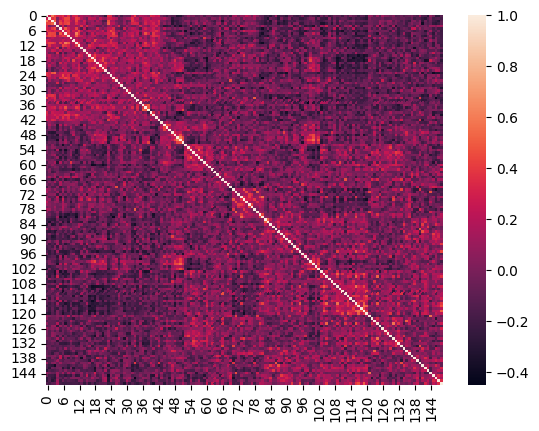

<Figure size 640x480 with 0 Axes>

In [5]:
data_trans_heatmap = sb.heatmap(data_trans.corr())

plt.show()

save_path = pathlib.Path("figures/correlation_heatmap_sc.png")
plt.savefig(save_path, bbox_inches="tight")

### Create clustermap with correlation heatmap

/home/jenna/anaconda3/envs/5.analyze_data_NF1/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


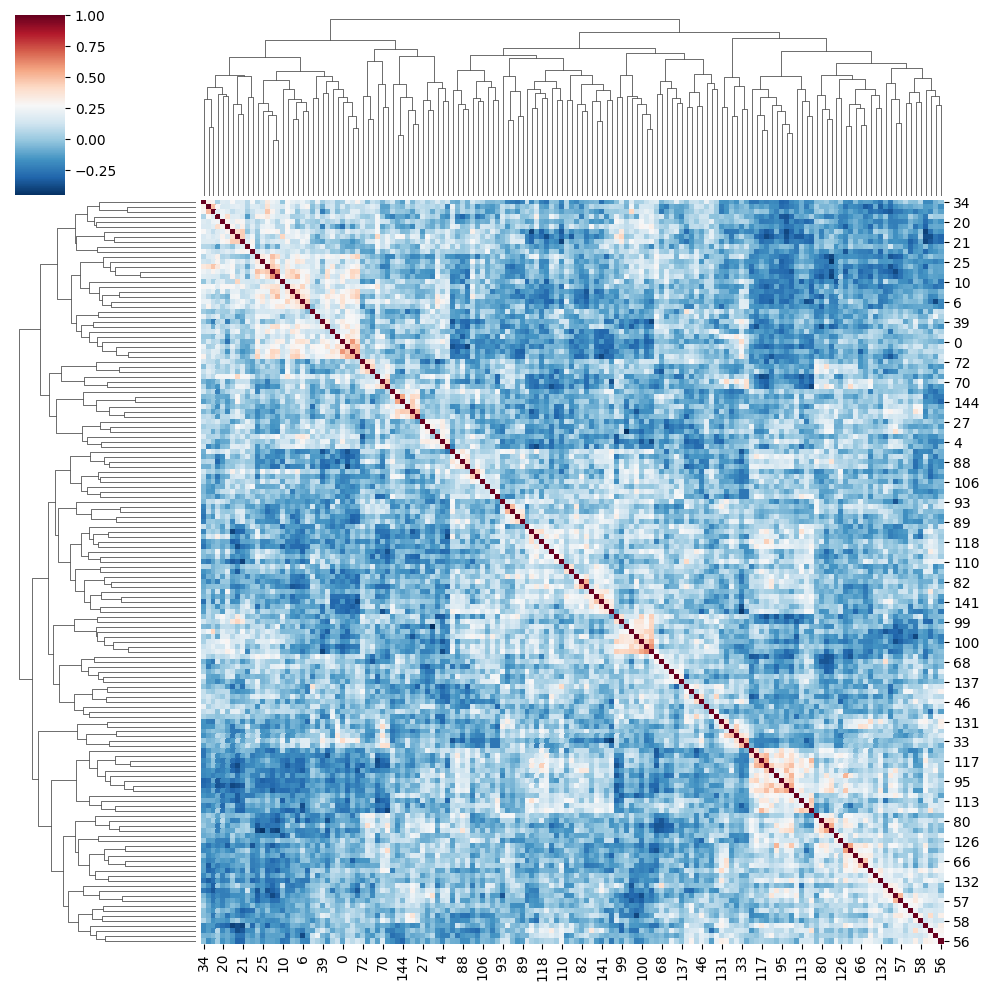

In [6]:
sb.clustermap(data_trans.corr(), 
            cmap='RdBu_r',
            )

save_path = pathlib.Path("figures/correlation_clustermap_sc.png")
plt.savefig(save_path, bbox_inches="tight")

## DeepProfiler data

In [7]:
norm_fs_data_nuc = pathlib.Path("../../../4_processing_features/data/nf1_sc_norm_fs_deepprofiler_nuc.csv.gz")
norm_fs_data_cyto = pathlib.Path("../../../4_processing_features/data/nf1_sc_norm_fs_deepprofiler_cyto.csv.gz")

data_nuc = pd.read_csv(norm_fs_data_nuc)
data_cyto = pd.read_csv(norm_fs_data_cyto)

print(data_nuc.shape)
data_nuc.head()

(257, 3837)


,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_ER,Metadata_Actin,Metadata_Genotype,...,efficientnet_3830,efficientnet_3831,efficientnet_3832,efficientnet_3833,efficientnet_3834,efficientnet_3835,efficientnet_3836,efficientnet_3837,efficientnet_3838,efficientnet_3839
0,652.868421,760.552632,1,D6,3,1_D6_3,../../../../1_preprocessing_data/Corrected_Ima...,../../../../1_preprocessing_data/Corrected_Ima...,../../../../1_preprocessing_data/Corrected_Ima...,WT,...,-0.514201,0.478099,0.484105,-0.212163,-0.572581,-0.239070,0.907958,0.219261,0.311132,-0.288884
1,1015.898477,209.162437,1,F6,2,1_F6_2,../../../../1_preprocessing_data/Corrected_Ima...,../../../../1_preprocessing_data/Corrected_Ima...,../../../../1_preprocessing_data/Corrected_Ima...,WT,...,-0.250138,-0.740111,-0.190505,-0.690312,-0.862426,4.039268,-1.532861,-1.382833,-0.336643,0.894669
2,387.202830,238.853774,1,F6,2,1_F6_2,../../../../1_preprocessing_data/Corrected_Ima...,../../../../1_preprocessing_data/Corrected_Ima...,../../../../1_preprocessing_data/Corrected_Ima...,WT,...,-0.358730,-0.183352,1.252175,-0.824103,-0.185720,-0.380602,0.464281,0.019876,0.793334,1.428218
3,259.502304,250.400922,1,F6,2,1_F6_2,../../../../1_preprocessing_data/Corrected_Ima...,../../../../1_preprocessing_data/Corrected_Ima...,../../../../1_preprocessing_data/Corrected_Ima...,WT,...,0.540821,-0.724848,1.529958,-0.940500,-0.649775,-0.212045,0.009084,0.655653,-0.164469,0.250813
4,351.255708,592.429224,1,F6,2,1_F6_2,../../../../1_preprocessing_data/Corrected_Ima...,../../../../1_preprocessing_data/Corrected_Ima...,../../../../1_preprocessing_data/Corrected_Ima...,WT,...,-0.408348,-0.629579,-0.423012,-1.421697,0.519623,-0.639995,0.571886,-1.031720,-0.108736,0.103133


In [8]:
metadata_dataframe_nuc, feature_data_nuc = utils.split_data(data_nuc)

feature_data_nuc = feature_data_nuc.drop(['Location_Center_X', 'Location_Center_Y'], axis=1)

print(feature_data_nuc.shape)
feature_data_nuc.head()

(257, 3825)


,efficientnet_0,efficientnet_1,efficientnet_10,efficientnet_100,efficientnet_1000,efficientnet_1001,efficientnet_1002,efficientnet_1003,efficientnet_1004,efficientnet_1005,...,efficientnet_990,efficientnet_991,efficientnet_992,efficientnet_993,efficientnet_994,efficientnet_995,efficientnet_996,efficientnet_997,efficientnet_998,efficientnet_999
0,0.235069,-2.524998,-0.645525,-0.321902,0.327108,-0.425506,0.109151,-0.522269,-0.248527,-1.001633,...,-0.745270,-0.594816,-0.450050,-0.059045,-0.647262,-0.209944,0.866904,0.236938,-0.026535,-0.276103
1,-0.623746,1.037700,1.009706,-0.418760,0.288138,-0.374713,-0.480356,0.142850,-0.198695,0.062926,...,2.162966,-0.373870,0.273352,-0.867027,-0.576743,0.107865,-0.154136,-0.675416,0.090121,2.199593
2,-0.514111,0.838314,0.741559,0.007390,-0.343973,0.162181,-0.167019,-0.035345,0.142035,-0.430217,...,-0.247819,-0.051758,-0.282056,0.498236,-0.575197,-0.652407,-0.175582,0.287247,-0.310507,-0.001377
3,-0.590767,-0.004433,-1.088701,1.448685,0.253028,0.257632,-0.265532,3.350086,0.145468,0.271872,...,-0.060401,0.820960,0.148889,-1.753011,0.850738,1.141865,1.014065,-0.894101,1.714785,3.437282
4,-0.630595,-0.344079,1.002623,-0.005197,-1.205885,0.062935,-0.146158,-0.390066,0.045541,-0.298416,...,0.459659,0.901046,-1.393525,0.293504,-0.724374,-0.392195,-0.502709,-0.853243,1.176767,-0.377427


In [9]:
metadata_dataframe_cyto, feature_data_cyto = utils.split_data(data_cyto)

feature_data_cyto = feature_data_cyto.drop(['Location_Center_X', 'Location_Center_Y'], axis=1)

print(feature_data_cyto.shape)
feature_data_cyto.head()

(256, 3832)


,efficientnet_0,efficientnet_1,efficientnet_10,efficientnet_100,efficientnet_1000,efficientnet_1001,efficientnet_1002,efficientnet_1003,efficientnet_1004,efficientnet_1005,...,efficientnet_990,efficientnet_991,efficientnet_992,efficientnet_993,efficientnet_994,efficientnet_995,efficientnet_996,efficientnet_997,efficientnet_998,efficientnet_999
0,0.518928,-1.030638,-0.176670,-0.658651,-0.231146,-0.410912,1.258987,0.528172,-0.462594,-0.798068,...,-0.749512,-0.732841,0.767652,-0.881471,-0.512916,-0.123882,-0.047746,-0.188216,0.222457,0.343864
1,-0.532346,0.038914,-0.481328,-0.494546,-0.460594,-0.361398,-0.503176,-0.468075,0.429030,-0.015511,...,0.111416,-0.817825,-1.079264,-1.538474,0.100065,-0.407861,-0.273762,-1.445162,0.608907,-0.422729
2,0.717823,1.356706,0.209188,-0.497367,-0.710925,-0.286272,-0.258021,-0.265605,-0.434462,-0.365862,...,-0.585437,-0.748314,0.562900,-0.810733,-0.278916,0.418900,-0.477898,0.500113,-0.110842,0.531526
3,-0.083235,-0.367833,-0.047480,1.570235,-0.601118,0.391697,0.271105,2.680643,-0.773746,0.150493,...,1.544803,0.140156,0.679623,0.881273,1.707555,-0.419930,-0.169850,-0.467632,-0.659259,-0.136917
4,-0.698319,-0.016846,-0.113460,0.370509,-0.797704,-0.594630,-0.816060,-0.001589,-0.834368,-0.709130,...,-0.374620,0.715716,-0.446599,-0.323712,-0.663026,-0.708899,-0.434248,-0.835424,0.168417,0.139753


In [10]:
data_trans_nuc = feature_data_nuc.transpose()
data_trans_cyto = feature_data_cyto.transpose()

print(data_trans_nuc.shape)
data_trans_nuc.head()

(3825, 257)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
efficientnet_0,0.235069,-0.623746,-0.514111,-0.590767,-0.630595,-0.359079,-0.341186,-0.154527,-0.579000,0.900427,...,1.562521,-0.834221,8.229311,-0.950903,0.271190,-1.367536,-0.243420,-0.576236,-0.068593,-1.049778
efficientnet_1,-2.524998,1.037700,0.838314,-0.004433,-0.344079,-0.306731,0.588526,-0.149742,-0.190140,0.130578,...,0.268620,0.734188,-0.372908,0.074480,0.585401,-1.172092,0.385321,-0.366125,0.766005,-0.376811
efficientnet_10,-0.645525,1.009706,0.741559,-1.088701,1.002623,0.828533,0.212029,0.090782,-1.425734,0.233769,...,0.688113,-0.907912,-1.402194,-0.636462,0.425557,-0.719461,-0.986968,-1.765824,-1.020527,1.006661
efficientnet_100,-0.321902,-0.418760,0.007390,1.448685,-0.005197,0.030547,-0.483491,0.105981,-0.924137,-0.011339,...,0.538288,-0.983897,-0.561024,-0.545508,4.226676,-0.126215,1.975225,-0.630248,-0.505554,3.233745
efficientnet_1000,0.327108,0.288138,-0.343973,0.253028,-1.205885,-0.282687,-0.423432,-0.666493,3.504312,-0.337093,...,0.267101,-0.094304,-0.688202,-0.650749,-0.445264,0.152371,0.086575,2.482899,-0.961708,-0.155465


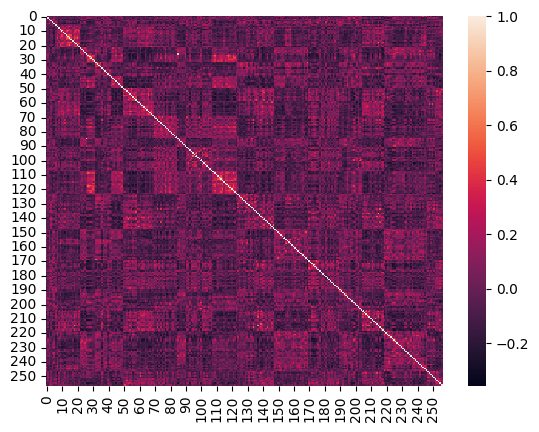

In [11]:
data_trans_nuc_heatmap = sb.heatmap(data_trans_nuc.corr())

plt.show()

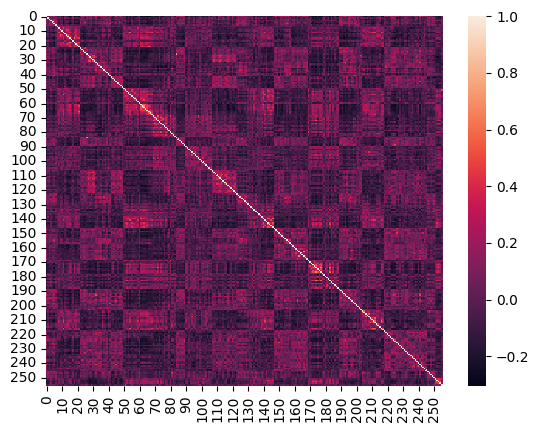

In [12]:
data_trans_cyto_heatmap = sb.heatmap(data_trans_cyto.corr())

plt.show()

/home/jenna/anaconda3/envs/5.analyze_data_NF1/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


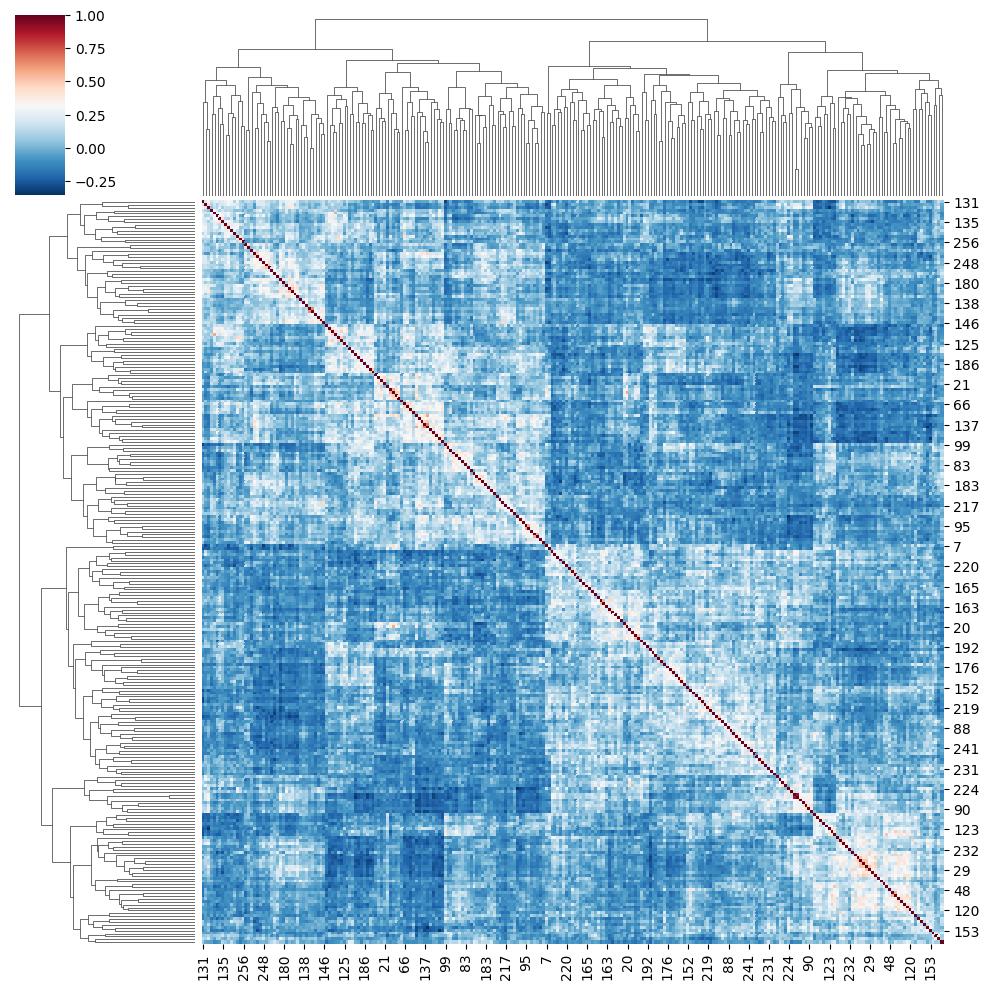

In [13]:
sb.clustermap(data_trans_nuc.corr(), 
            cmap='RdBu_r',
            )

save_path = pathlib.Path("figures/correlation_clustermap_sc_dp_nuc.png")
plt.savefig(save_path, bbox_inches="tight")

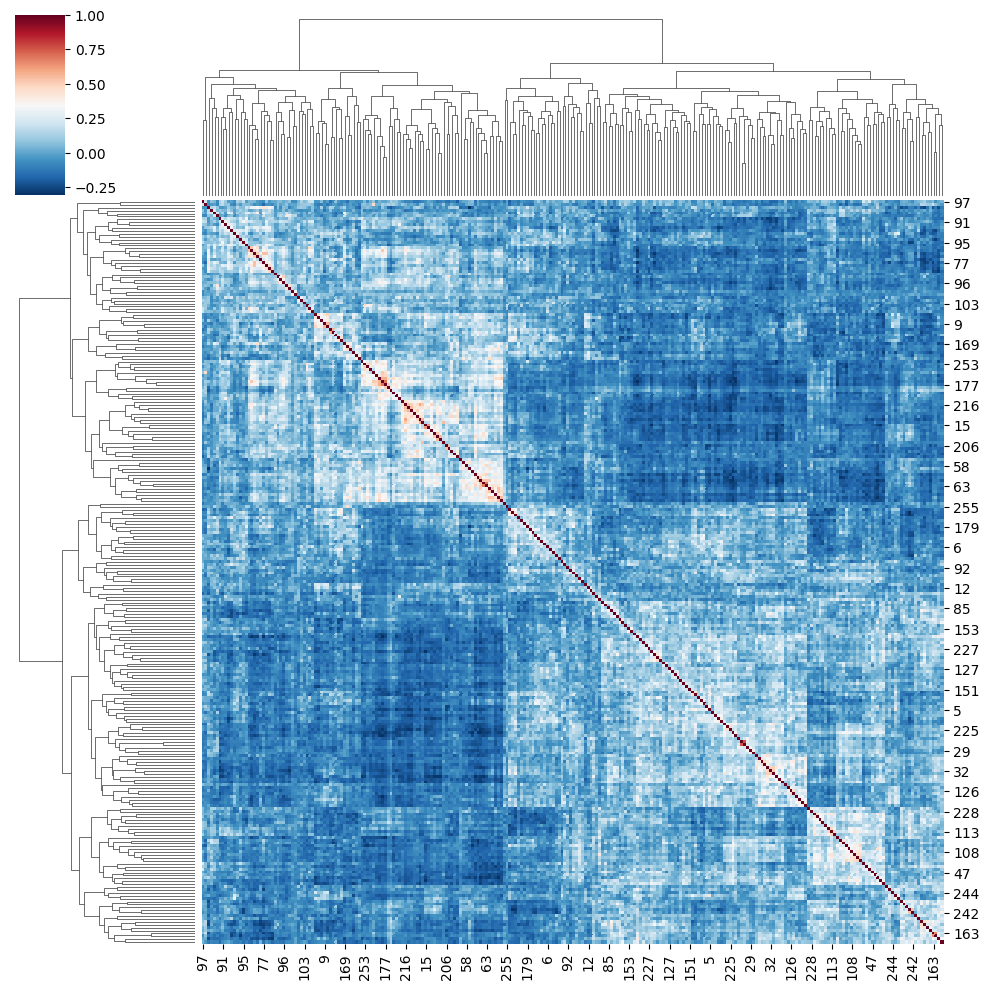

In [14]:
sb.clustermap(data_trans_cyto.corr(), 
            cmap='RdBu_r',
            )

save_path = pathlib.Path("figures/correlation_clustermap_sc_dp_cyto.png")
plt.savefig(save_path, bbox_inches="tight")